Question 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding


In [11]:
# Load
data = loadmat("face.mat")
faces = data['Y'].reshape(10304, 33).T  # Reshape to (10304, 33)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


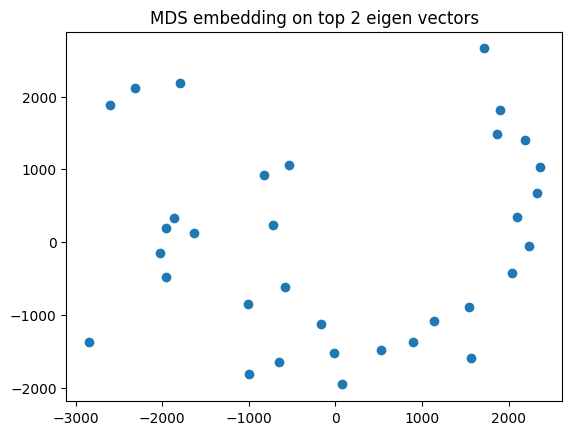

In [3]:
# (MDS)
mds = MDS(n_components=2)
embedding = mds.fit_transform(faces)

plt.scatter(embedding[:,0], embedding[:,1])
plt.title('MDS embedding on top 2 eigen vectors')
plt.show()


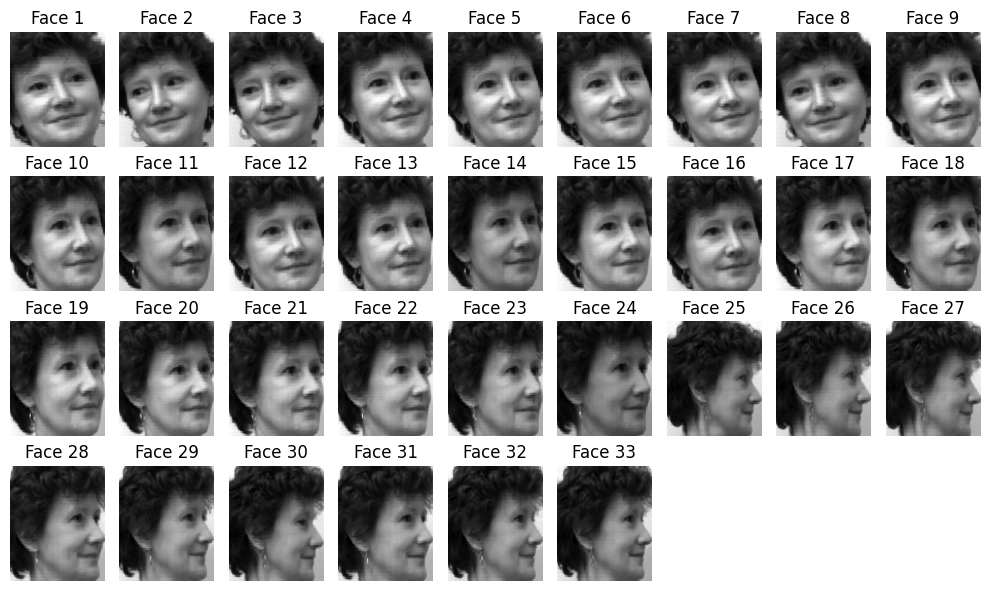

In [4]:


# Get the first eigenvector values
eigenvector_1 = embedding[:, 0]

# Order the faces according to the first eigenvector
ordered_indices = np.argsort(eigenvector_1)

# Visualize the results
plt.figure(figsize=(10, 6))
for i, idx in enumerate(ordered_indices):
    plt.subplot(4, 9, i + 1)
    plt.imshow(faces[idx].reshape(112, 92), cmap='gray')
    plt.title(f"Face {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()


MDS is based on Euclidean distances and is not able to capture the faces in the accurate direction

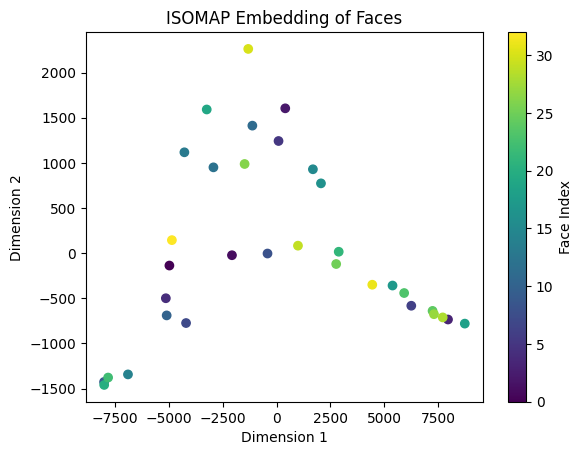

In [14]:
# isomap
n_neighbors = 5
n_components = 2
isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
embedding_isomap = isomap.fit_transform(faces)

plt.figure()
plt.scatter(embedding_isomap[:, 0], embedding_isomap[:, 1], c=np.arange(33), cmap='viridis')
plt.colorbar(label='Face Index')
plt.title('ISOMAP Embedding of Faces')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

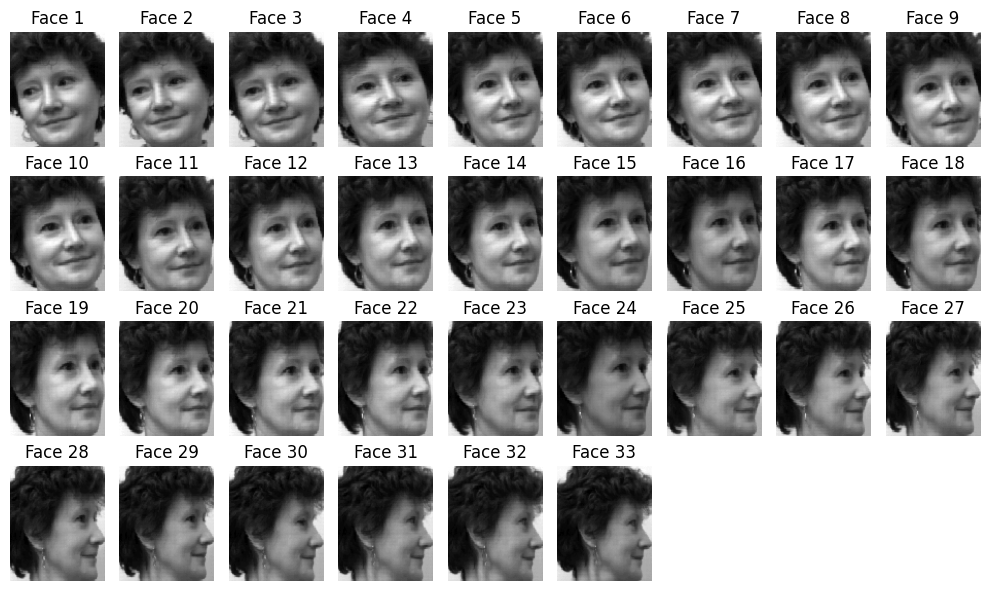

In [15]:
isoindex = np.argsort(embedding_isomap[:, 0])

plt.figure(figsize=(10, 6))
for i, idx in enumerate(isoindex):
    plt.subplot(4, 9, i + 1)
    plt.imshow(faces[idx].reshape(112, 92), cmap='gray')
    plt.title(f"Face {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()



Isomap preserves the order of faces as view changes from right to left. The geodeic distances used by isomap preserve the face angles compared to the euclidean distance used in MDS

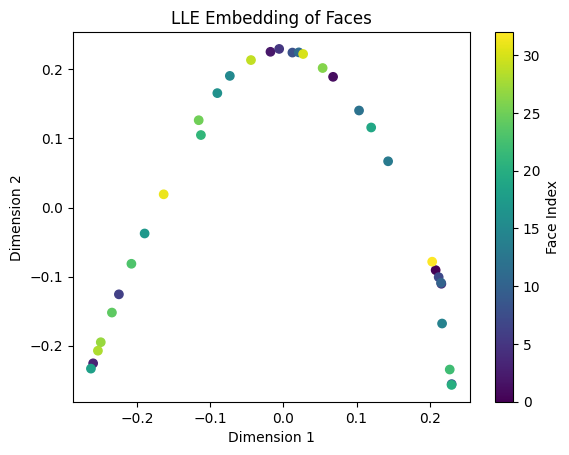

In [17]:
# LLE
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components)

embedding_lle = lle.fit_transform(faces)

plt.figure()
plt.scatter(embedding_lle[:, 0], embedding_lle[:, 1], c=np.arange(33), cmap='viridis')
plt.colorbar(label='Face Index')
plt.title('LLE Embedding of Faces')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

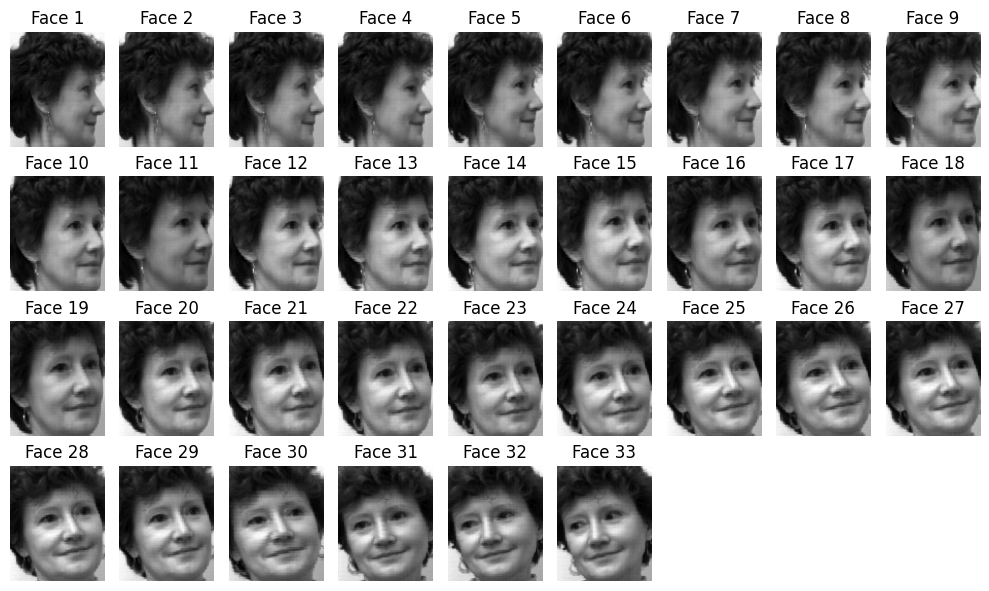

In [18]:
lleindex = np.argsort(embedding_lle[:, 0])

plt.figure(figsize=(10, 6))
for i, idx in enumerate(lleindex):
    plt.subplot(4, 9, i + 1)
    plt.imshow(faces[idx].reshape(112, 92), cmap='gray')
    plt.title(f"Face {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()

LLE preserves distances around the neighborhood, thus it orders the faces right to left, opposite to isomap.
LLE and isomap are able to preserve the order of faces well while MDS is not able to capture tha angular data due to Euclidean distance

Question 2

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


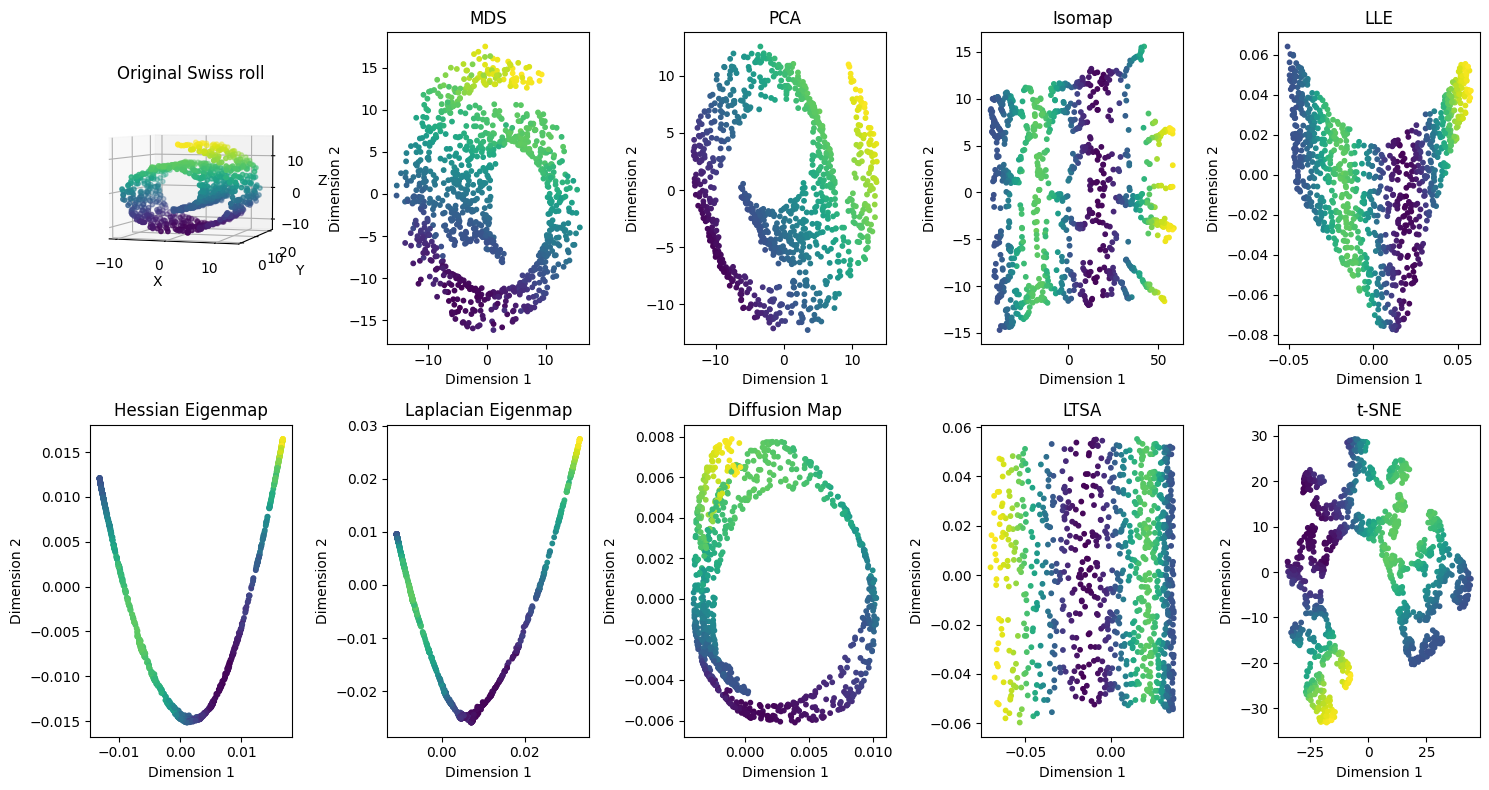

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, SpectralEmbedding, TSNE
from sklearn.metrics.pairwise import pairwise_distances
from mpl_toolkits.mplot3d import Axes3D

# Generate Swiss roll dataset
X, _ = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# Define the number of components for each method
n_components = 2

# Initialize manifold learning algorithms
methods = {
    'MDS': MDS(n_components=n_components),
    'PCA': PCA(n_components=n_components),
    'Isomap': Isomap(n_components=n_components),
    'LLE': LocallyLinearEmbedding(n_neighbors=10, n_components=n_components, method='standard'),
    'Hessian Eigenmap': SpectralEmbedding(n_components=n_components, affinity='nearest_neighbors', n_neighbors=10),
    'Laplacian Eigenmap': SpectralEmbedding(n_components=n_components, affinity='rbf'),
    'Diffusion Map': SpectralEmbedding(n_components=n_components, affinity='precomputed'),
    'LTSA': LocallyLinearEmbedding(n_neighbors=10, n_components=n_components, method='ltsa'),
    't-SNE': TSNE(n_components=n_components, perplexity=30, init='pca',
                                 random_state=42)

}

# Precompute pairwise distances for Diffusion Map
pairwise_dist = pairwise_distances(X)

# Create subplots
fig, axs = plt.subplots(2,5, figsize=(15, 8))
axs = axs.ravel()
axs[0].axis('off')

ax = fig.add_subplot(2, 5, 1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X[:, 2], cmap=plt.cm.viridis, s=10)
ax.set_title('Original Swiss roll')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(4,-72)

# Plot the original Swiss roll dataset
#axs[0].scatter(X[:, 0], X[:, 1], c=X[:, 2], cmap=plt.cm.viridis, s=10)
#axs[0].set_title('Original Swiss Roll')
#axs[0].set_xlabel('X')
#axs[0].set_ylabel('Y')

# Loop through each method and plot the results
for i, (method_name, method) in enumerate(methods.items()):
    # Fit and transform the data
    if method_name == 'Diffusion Map':
        # Diffusion Map requires a precomputed affinity matrix
        affinity_matrix = np.exp(-pairwise_dist ** 2 / pairwise_dist.std() ** 2)
        transformed_data = method.fit_transform(affinity_matrix)
    else:
        transformed_data = method.fit_transform(X)

    # Plot the results
    axs[i+1].scatter(transformed_data[:, 0], transformed_data[:, 1], c=X[:, 2], cmap=plt.cm.viridis, s=10)
    axs[i+1].set_title(method_name)
    axs[i+1].set_xlabel('Dimension 1')
    axs[i+1].set_ylabel('Dimension 2')

plt.tight_layout()
plt.show()


PCA and MDS cannot preserve the structure. LTSa performs well.tSNE could not represent the data effectively in low dimenions. Hessian, diffusion, isomaps are also not good.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:939: LinAlgWarning: Diagonal number 11 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)


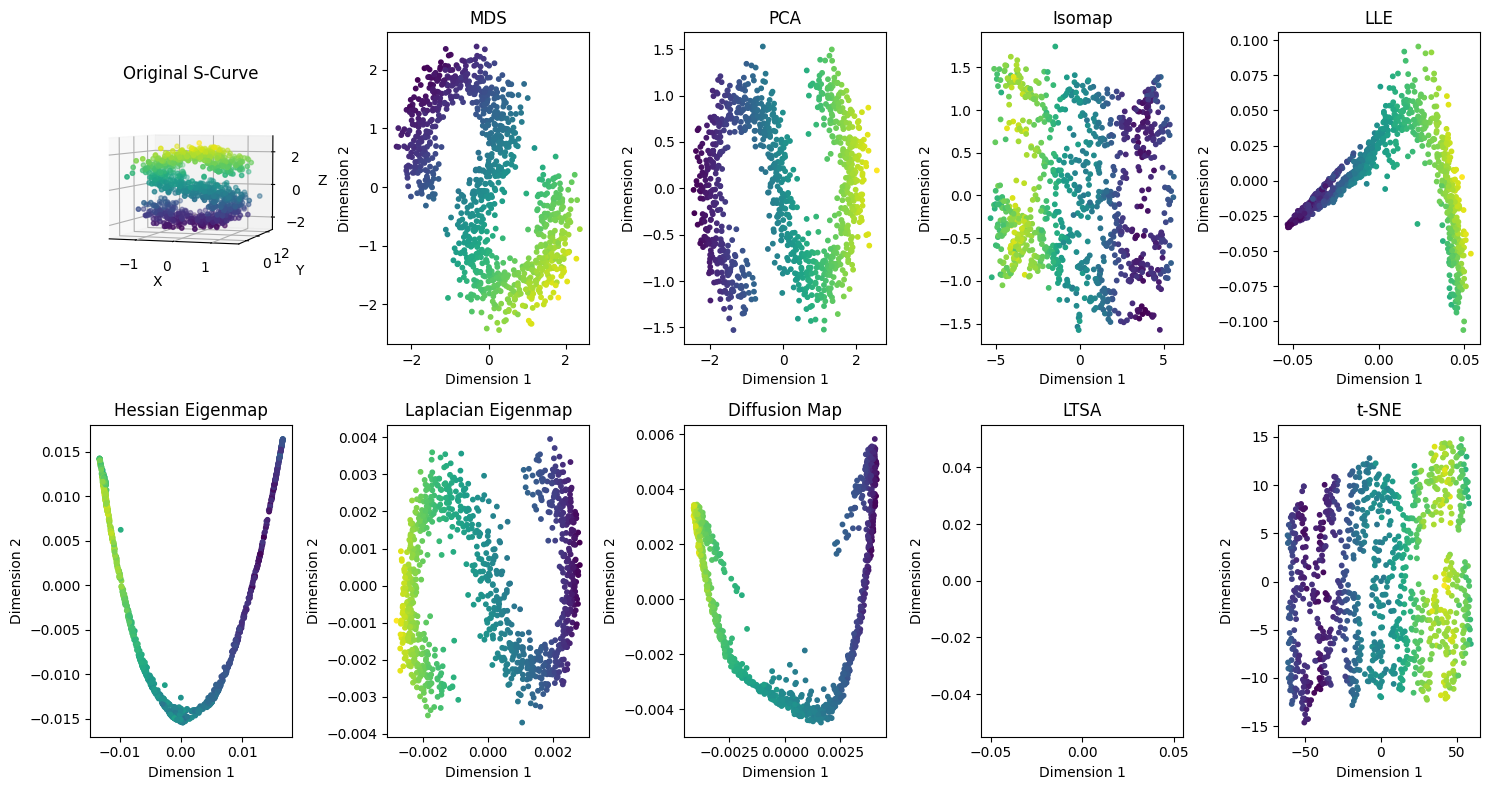

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, SpectralEmbedding, TSNE
from sklearn.metrics.pairwise import pairwise_distances

X, _ = datasets.make_s_curve(n_samples=1000, noise=0.2, random_state=42)

# Initialize manifold learning algorithms
methods = {
    'MDS': MDS(n_components=n_components),
    'PCA': PCA(n_components=n_components),
    'Isomap': Isomap(n_components=n_components),
    'LLE': LocallyLinearEmbedding(n_neighbors=10, n_components=n_components, method='standard'),
    'Hessian Eigenmap': SpectralEmbedding(n_components=n_components, affinity='nearest_neighbors', n_neighbors=10),
    'Laplacian Eigenmap': SpectralEmbedding(n_components=n_components, affinity='rbf'),
    'Diffusion Map': SpectralEmbedding(n_components=n_components, affinity='precomputed'),
    'LTSA': LocallyLinearEmbedding(n_neighbors=10, n_components=n_components, method='ltsa'),
    't-SNE': TSNE(n_components=n_components, perplexity=30, init='pca',
                                 random_state=42)

}

# Precompute pairwise distances for Diffusion Map
pairwise_dist = pairwise_distances(X)

# Create subplots
fig, axs = plt.subplots(2,5, figsize=(15, 8))
axs = axs.ravel()

axs[0].axis('off')

ax = fig.add_subplot(2, 5, 1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X[:, 2], cmap=plt.cm.viridis, s=10)
ax.set_title('Original S-Curve')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(4,-72)

# Plot the original Swiss roll dataset
#axs[0].scatter(X[:, 0], X[:, 1], c=X[:, 2], cmap=plt.cm.viridis, s=10)
#axs[0].set_title('Original S curve')
#axs[0].set_xlabel('X')
#axs[0].set_ylabel('Y')

# Loop through each method and plot the results
for i, (method_name, method) in enumerate(methods.items()):
    # Fit and transform the data
    if method_name == 'Diffusion Map':
        # Diffusion Map requires a precomputed affinity matrix
        affinity_matrix = np.exp(-pairwise_dist ** 2 / pairwise_dist.std() ** 2)
        transformed_data = method.fit_transform(affinity_matrix)
    else:
        transformed_data = method.fit_transform(X)

    # Plot the results
    axs[i+1].scatter(transformed_data[:, 0], transformed_data[:, 1], c=X[:, 2], cmap=plt.cm.viridis, s=10)
    axs[i+1].set_title(method_name)
    axs[i+1].set_xlabel('Dimension 1')
    axs[i+1].set_ylabel('Dimension 2')

plt.tight_layout()
plt.show()

MDS and PCA work well. The manifold cant identify the boundaries. tSNE does could not represen effectively in low dimension

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/loca

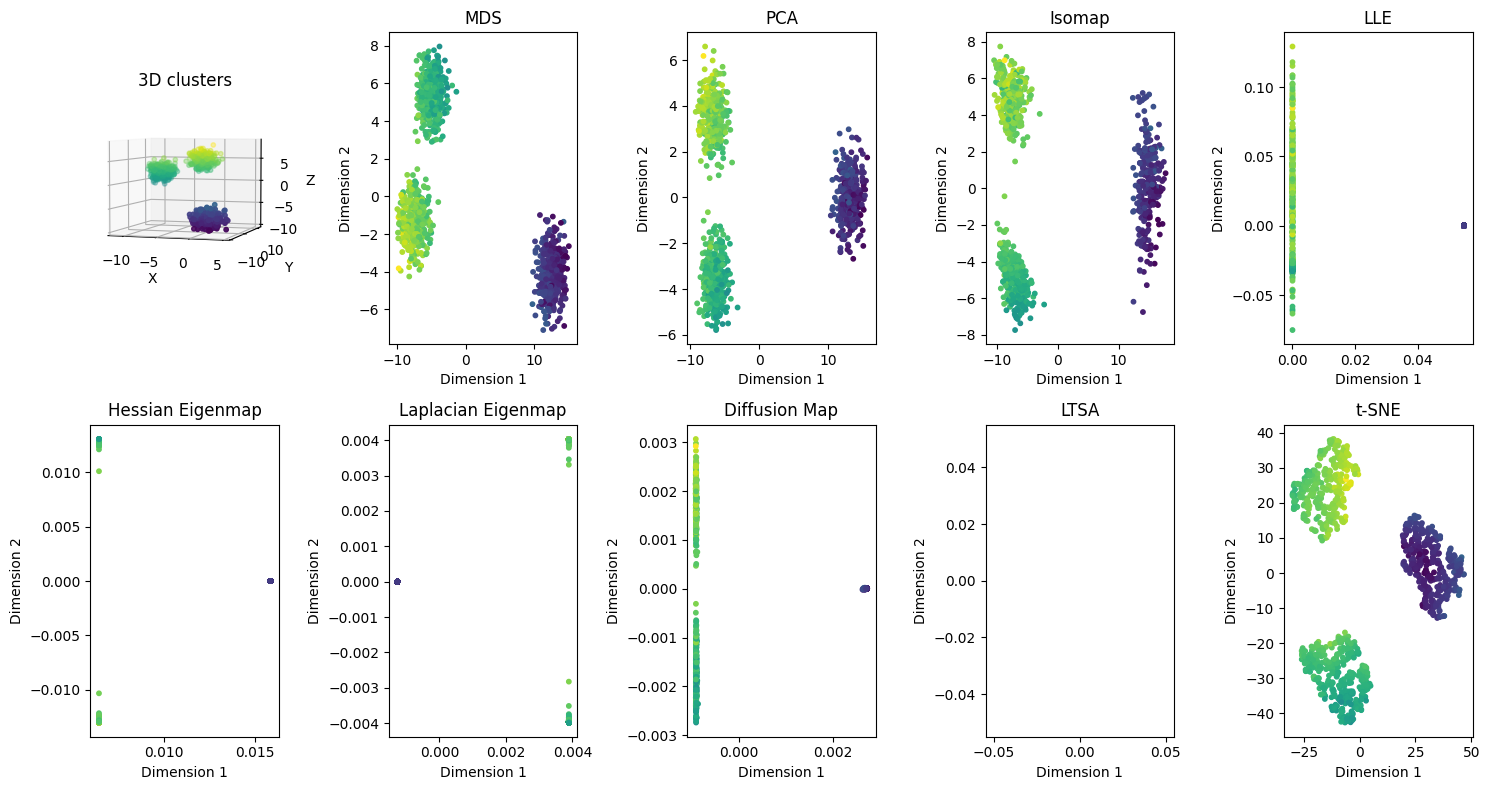

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, SpectralEmbedding, TSNE
from sklearn.metrics.pairwise import pairwise_distances

X, _ = datasets.make_blobs(n_samples=1000, n_features=3, centers=3, random_state=42)

# Initialize manifold learning algorithms
methods = {
    'MDS': MDS(n_components=n_components),
    'PCA': PCA(n_components=n_components),
    'Isomap': Isomap(n_components=n_components),
    'LLE': LocallyLinearEmbedding(n_neighbors=10, n_components=n_components, method='standard'),
    'Hessian Eigenmap': SpectralEmbedding(n_components=n_components, affinity='nearest_neighbors', n_neighbors=10),
    'Laplacian Eigenmap': SpectralEmbedding(n_components=n_components, affinity='rbf'),
    'Diffusion Map': SpectralEmbedding(n_components=n_components, affinity='precomputed'),
    'LTSA': LocallyLinearEmbedding(n_neighbors=10, n_components=n_components, method='ltsa'),
    't-SNE': TSNE(n_components=n_components, perplexity=30, init='pca',
                                 random_state=42)

}

# Precompute pairwise distances for Diffusion Map
pairwise_dist = pairwise_distances(X)

# Create subplots
fig, axs = plt.subplots(2,5, figsize=(15, 8))
axs = axs.ravel()

axs[0].axis('off')

ax = fig.add_subplot(2, 5, 1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X[:, 2], cmap=plt.cm.viridis, s=10)
ax.set_title('3D clusters')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(4,-72)

# Plot the original Swiss roll dataset
#axs[0].scatter(X[:, 0], X[:, 1], c=X[:, 2], cmap=plt.cm.viridis, s=10)
#axs[0].set_title('Original S curve')
#axs[0].set_xlabel('X')
#axs[0].set_ylabel('Y')

# Loop through each method and plot the results
for i, (method_name, method) in enumerate(methods.items()):
    # Fit and transform the data
    if method_name == 'Diffusion Map':
        # Diffusion Map requires a precomputed affinity matrix
        affinity_matrix = np.exp(-pairwise_dist ** 2 / pairwise_dist.std() ** 2)
        transformed_data = method.fit_transform(affinity_matrix)
    else:
        transformed_data = method.fit_transform(X)

    # Plot the results
    axs[i+1].scatter(transformed_data[:, 0], transformed_data[:, 1], c=X[:, 2], cmap=plt.cm.viridis, s=10)
    axs[i+1].set_title(method_name)
    axs[i+1].set_xlabel('Dimension 1')
    axs[i+1].set_ylabel('Dimension 2')

plt.tight_layout()
plt.show()

MDS and PCa work well, Euclidean distances are helpful. tSNE also identifies well. LLE, hessain Laplacian dont work seems like manifold structure is not preserved in 2D

Question3

In [50]:
import numpy as np
import scipy.io

# Load the Swiss-Roll dataset
data = scipy.io.loadmat('swiss_roll_data.mat')
X = data['X']  # 3D-data

# Define parameters
n = 100  # Number of random data points for block A
k = 2    # Number of desired eigenvectors

# Randomly select n data points
random_indices = np.random.choice(X.shape[0], n, replace=False)
block_A = X[random_indices]

# Compute the spectral decomposition of A
eigenvalues, eigenvectors = np.linalg.eigh(np.dot(block_A, block_A.T))
sorted_indices = np.argsort(eigenvalues)[::-1][:k]
U_k = eigenvectors[:, sorted_indices]

# Compute X1 and X2
X1 = np.dot(U_k, np.diag(np.sqrt(eigenvalues[sorted_indices])))
X2 = np.dot(np.dot(block_A.T, np.linalg.pinv(X1)), U_k)

# Compute the approximation ^K
A = np.dot(X1, X1.T)
B = np.dot(X1, X2.T)
C_hat = np.dot(X2, X2.T)
A_pseudo_inv = np.linalg.pinv(A)
K_hat = np.block([[A, B], [B.T, C_hat - np.dot(np.dot(B.T, A_pseudo_inv), B)]])

# Implement ISOMAP using the approximation ^K
# (You can use the Nyström method here to compute the eigenvectors of K_hat)

# Perform ISOMAP on K_hat
# (Compute eigenvalues and eigenvectors, and select top k eigenvectors)

# Embed the data into the low-dimensional space using the selected eigenvectors
# (This will give you the reduced-dimensional representation of the Swiss-Roll dataset)

# Visualize the embedding in the reduced-dimensional space



KeyError: 'X'

In [54]:
# Load the Swiss-Roll dataset
X = data['X_data']  # Features
Y = data['Y_data']  # Labels (if available)

# Define parameters
n = 1000  # Number of random data points for block A
k = 2    # Number of desired eigenvectors

# Randomly select n data points
random_indices = np.random.choice(X.shape[0], n)# replace=False)
block_A = X[random_indices]

# Compute the spectral decomposition of A
eigenvalues, eigenvectors = np.linalg.eigh(np.dot(block_A, block_A.T))
sorted_indices = np.argsort(eigenvalues)[::-1][:k]
U_k = eigenvectors[:, sorted_indices]

# Compute X1 and X2
X1 = np.dot(U_k, np.diag(np.sqrt(eigenvalues[sorted_indices])))
X2 = np.dot(np.dot(block_A.T, np.linalg.pinv(X1)), U_k)

# Compute the approximation ^K
A = np.dot(X1, X1.T)
B = np.dot(X1, X2.T)
C_hat = np.dot(X2, X2.T)
A_pseudo_inv = np.linalg.pinv(A)
K_hat = np.block([[A, B], [B.T, C_hat - np.dot(np.dot(B.T, A_pseudo_inv), B)]])

# Implement ISOMAP using the approximation ^K
# (You can use the Nyström method here to compute the eigenvectors of K_hat)

# Perform ISOMAP on K_hat
# (Compute eigenvalues and eigenvectors, and select top k eigenvectors)

# Embed the data into the low-dimensional space using the selected eigenvectors
# (This will give you the reduced-dimensional representation of the Swiss-Roll dataset)

# Visualize the embedding in the reduced-dimensional space


ValueError: shapes (20000,1000) and (2,1000) not aligned: 1000 (dim 1) != 2 (dim 0)

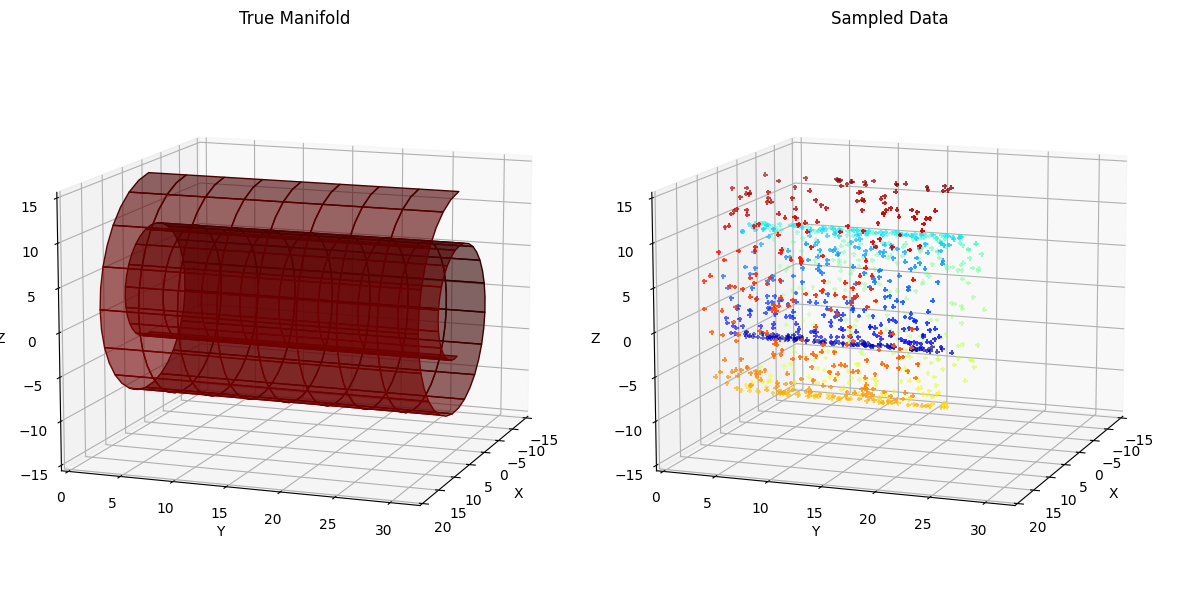

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
N = 1000


# Plot true manifold
tt0 = (3*np.pi/2)*(1+2*np.arange(0, 1.01, 0.02))
hh = np.arange(0, 1.01, 0.125) * 30
tt0_grid, hh_grid = np.meshgrid(tt0, hh)
xx = tt0_grid * np.cos(tt0_grid)
yy = hh_grid
zz = tt0_grid * np.sin(tt0_grid)
cc = tt0_grid

fig = plt.figure(figsize=(18, 6))

# Plot true manifold
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
surf1 = ax1.plot_surface(xx, yy, zz, facecolors=plt.cm.jet(cc), alpha=0.6)
ax1.view_init(12, 20)
ax1.set_xlim([-15, 20])
ax1.set_ylim([0, 32])
ax1.set_zlim([-15, 15])
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('True Manifold')

# Generate sampled data
tt = (3*np.pi/2)*(1+2*np.random.rand(N))
height = 21*np.random.rand(N)
X = np.vstack((tt*np.cos(tt), height, tt*np.sin(tt)))

# Scatterplot of sampled data
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
scatter2 = ax2.scatter(X[0,:], X[1,:], X[2,:], c=tt, cmap='jet', s=12, marker='+')
ax2.view_init(12, 20)
ax2.set_xlim([-15, 20])
ax2.set_ylim([0, 32])
ax2.set_zlim([-15, 15])
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Sampled Data')


plt.tight_layout()
plt.show()


Landmark ISomap performs poorly compared to original Isomap on Swiss roll